In [1]:
import torch
from torch import nn
import numpy as np
from matplotlib import pyplot as plt
try :
  #helps in ploting the graphs
  import helper_functions as hf
except:
  from requests import get
  req  = get(url = "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  f = open("helper_functions.py" , "wb")
  f.write(req.content)
  f.close()
  import helper_functions as hf

In [2]:
#generating TOY data set
x = torch.arange(1,101).type(torch.float)
m , c = 20 , 42
y = m * x + c

In [3]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(x,y,test_size = 0.2,shuffle= False )


In [4]:
X_train.dtype

torch.float32

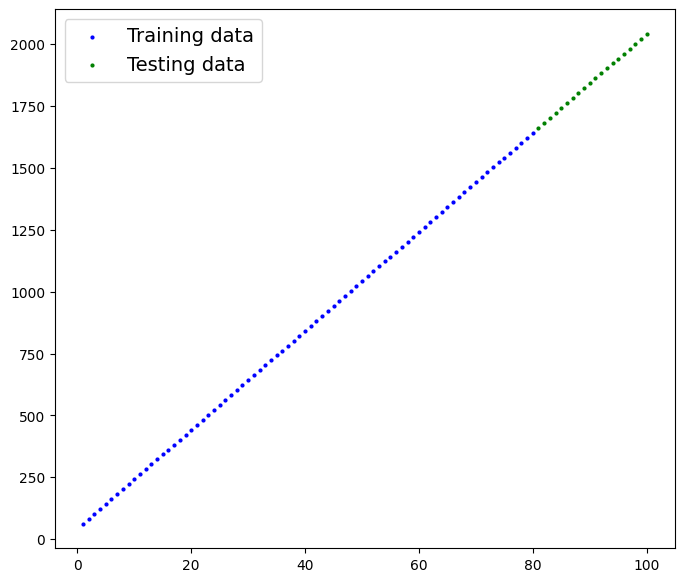

In [5]:
hf.plot_predictions(X_train , y_train , X_test , y_test)

In [6]:
class lin_model(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight  = nn.Parameter(torch.randn(1,requires_grad=True , dtype = torch.float))
    self.bias = nn.Parameter(torch.randn(1,requires_grad=True , dtype = torch.float))
  def forward(self,X:torch.tensor)->torch.tensor:
    return self.weight * X + self.bias

In [7]:
torch.manual_seed(1125)
model_0 = lin_model()

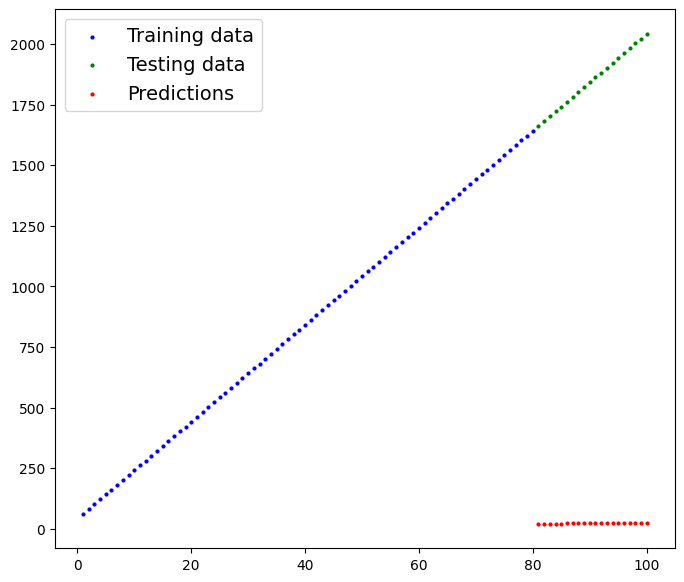

In [8]:
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)
hf.plot_predictions(X_train, y_train , X_test , y_test , y_preds)

In [9]:
epoch_count = [0]
train_loss_vals = []
test_loss_vals = []

In [10]:
loss_fn  = nn.L1Loss()
optim_fn = torch.optim.SGD(params = model_0.parameters() , lr = 0.001)

In [11]:
for epoch in range(1000+1):
  model_0.train()
  y_preds = model_0(X_train)
  loss = loss_fn(y_preds , y_train)
  optim_fn.zero_grad()
  loss.backward()
  optim_fn.step()

  model_0.eval()
  with torch.inference_mode():
    y_test_preds = model_0(X_test)
    test_loss = loss_fn(y_test_preds , y_test)


  if epoch==600 : optim_fn = torch.optim.SGD(params = model_0.parameters() , lr = 0.00008)
  if epoch % 50== 0 :
    print(f"epoch : {epoch} | train loss : {loss} | test loss : {test_loss}")
    print(model_0.state_dict())
    epoch_count.append(epoch)
    train_loss_vals.append(loss)
    test_loss_vals.append(test_loss)


epoch : 0 | train loss : 841.5604248046875 | test loss : 1824.8170166015625
OrderedDict([('weight', tensor([0.3020])), ('bias', tensor([-0.1520]))])
epoch : 50 | train loss : 759.498046875 | test loss : 1641.504638671875
OrderedDict([('weight', tensor([2.3270])), ('bias', tensor([-0.1020]))])
epoch : 100 | train loss : 677.4356079101562 | test loss : 1458.1922607421875
OrderedDict([('weight', tensor([4.3520])), ('bias', tensor([-0.0520]))])
epoch : 150 | train loss : 595.3727416992188 | test loss : 1274.8790283203125
OrderedDict([('weight', tensor([6.3770])), ('bias', tensor([-0.0020]))])
epoch : 200 | train loss : 513.31005859375 | test loss : 1091.566162109375
OrderedDict([('weight', tensor([8.4021])), ('bias', tensor([0.0480]))])
epoch : 250 | train loss : 431.2481994628906 | test loss : 908.2550659179688
OrderedDict([('weight', tensor([10.4270])), ('bias', tensor([0.0980]))])
epoch : 300 | train loss : 349.18634033203125 | test loss : 724.9439697265625
OrderedDict([('weight', tenso

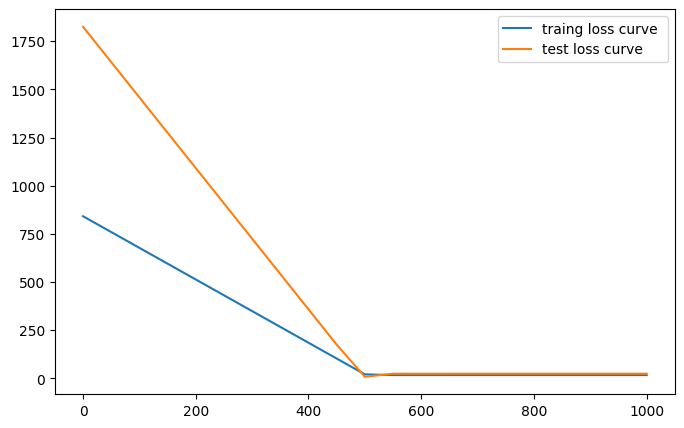

In [12]:
plt.figure(figsize = (8,5))
plt.plot( epoch_count[1:] ,  (torch.tensor(train_loss_vals)) , label = "traing loss curve ")
plt.plot(epoch_count[1:] , (torch.tensor(test_loss_vals)), label = "test loss curve")
plt.legend()

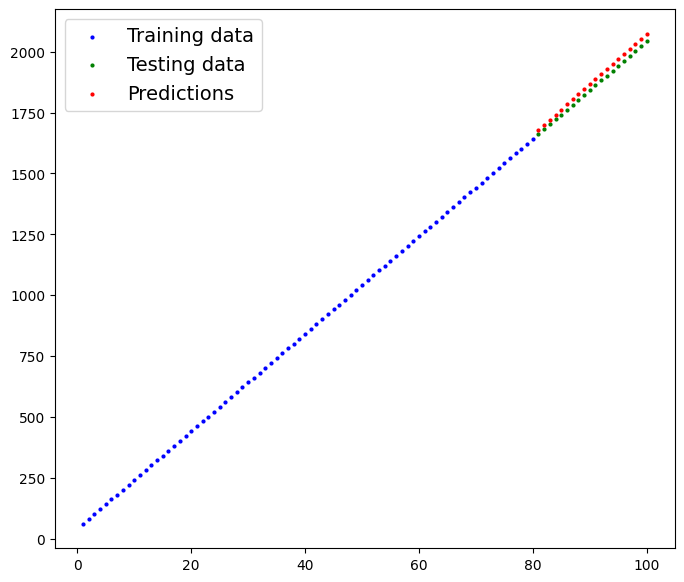

In [13]:
hf.plot_predictions(X_train , y_train , X_test , y_test , y_test_preds)

In [14]:
# lets check magnitude of predicted points vs actual points
x = np.array([127.44256])

In [15]:
y = m * x + c

In [16]:
model_0.eval()
with torch.inference_mode():
  y_p = model_0(torch.tensor(x)).numpy()

In [17]:
y_p

array([2642.25067119])

In [18]:
p , p_y = np.array([x , y]) , np.array([x,y_p])
p,p_y

(array([[ 127.44256],
        [2590.8512 ]]),
 array([[ 127.44256   ],
        [2642.25067119]]))

In [19]:
print(f"percentage error in point prediction : {round((abs(np.linalg.norm(p) - np.linalg.norm(p_y))/np.linalg.norm(p)),2)*100}%")

percentage error in point prediction : 2.0%


In [20]:
print(f"m : { m } , c : { c} ")
model_0.state_dict()

m : 20 , c : 42 


OrderedDict([('weight', tensor([20.7297])), ('bias', tensor([0.4051]))])

# we can observe that this simplest of simplest model was able to come near the actual m value(slope) ,
# it will be very intresting to see what models with muplite layer and activation can do...